In [1]:
import geopandas as gdp
import pandas as pd
import re
import mapclassify
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
case = df.iloc[:, [0, 2]]
case.columns = ["Count", "Location"]
case.loc[:, "City"] = case.Location.apply(lambda x: re.findall(r"\w+", x)[0])
case.loc[:, "Province"] = case.Location.apply(lambda x: re.findall(r"\w+", x)[1])
case.loc[case.Province == "Inner", "Province"] = "Nei Mongol"
case.loc[case.Province == "Ningxia", "Province"] = "Ningxia Hui"
case.loc[case.Province == "Xinjiang", "Province"] = "Xinjiang Uygur"

In [4]:
case.iloc[28, [2, 3]] = ["Yan'an", "Shaanxi"]
case.iloc[42, [2, 3]] = ["Pu'er", "Yunnan"]
case.iloc[148, [2, 3]] = ["Guang'an", "Sichuan"]
case.iloc[226, [2, 3]] = ["Lu'an", "Anhui"]
case.iloc[234, [2, 3]] = ["Huai'an", "Jiangsu"]
case.iloc[262, [2, 3]] = ["Xi'an", "Shaanxi"]
case.iloc[139, [2, 3]] = ["Ma'anshan", "Anhui"]

In [5]:
case[case.Province.apply(lambda x: len(x) < 5)]
# case[case.City.apply(lambda x: len(x) < 5)]

,Count,Location,City,Province


In [6]:
m = gdp.read_file('map/CHN_adm2.shp', encoding='utf8')

In [8]:
m.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,49,CHN,China,1,Anhui,1,Anqing,None,0,None,Dìjíshì,Prefecture City,安庆市,Ānqìng,"POLYGON ((117.11557 31.16616, 117.11788 31.160..."
1,49,CHN,China,1,Anhui,2,Bengbu,None,0,None,Dìjíshì,Prefecture City,蚌埠市,Bèngbù,"POLYGON ((117.26205 33.49959, 117.28395 33.497..."
2,49,CHN,China,1,Anhui,3,Bozhou,None,0,None,Dìjíshì,Prefecture City,亳州市,Bózhōu,"POLYGON ((115.73950 34.07428, 115.74284 34.072..."
3,49,CHN,China,1,Anhui,4,Chaohu,None,0,None,Dìjíshì,Prefecture City,巢湖市,Cháohú,"POLYGON ((118.36978 31.92897, 118.37383 31.924..."
4,49,CHN,China,1,Anhui,5,Chizhou,None,0,None,Dìjíshì,Prefecture City,池州市,Chízhōu,"POLYGON ((117.97800 30.82234, 117.97175 30.816..."


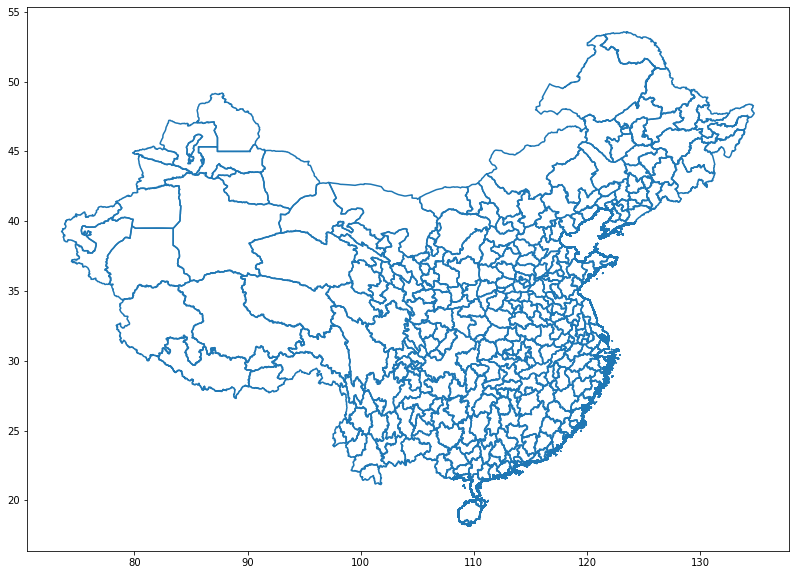

In [9]:
m.boundary.plot(figsize = (15, 10));

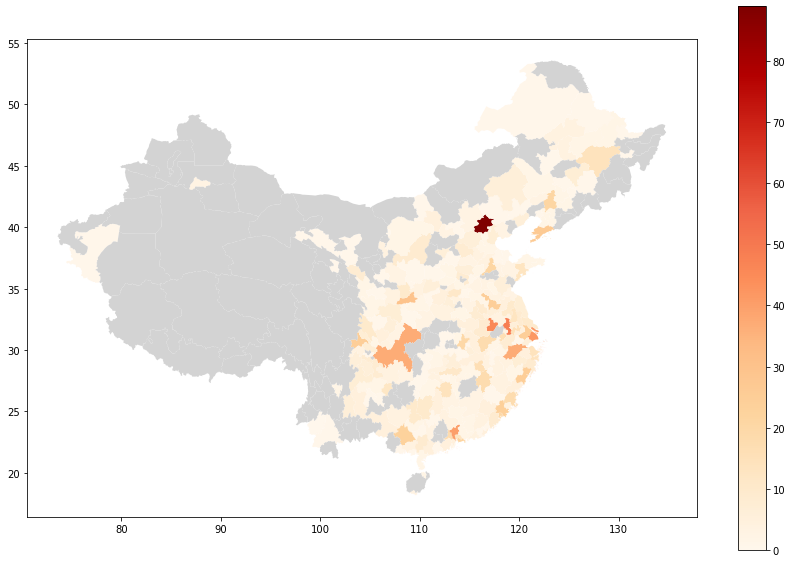

In [10]:
merged_df = pd.merge(m, case, left_on = "NAME_2", right_on = "City", how = "outer")
merged_df.plot(column = "Count",
               cmap = "OrRd",
               legend = True,
               figsize=(15, 10),
               missing_kwds={"color": "lightgrey",
                             #"hatch": "///",
                             "label": "Missing values"});

In [11]:
m_copy = m.iloc[:, [4, 6]]
m_copy.columns = ["Province", "City"]

In [12]:
m_copy[m_copy.Province == "Yunnan"]

,Province,City
317,Yunnan,Baoshan
318,Yunnan,Chuxiong Yi
319,Yunnan,Dêqên Tibetan
320,Yunnan,Dali Bai
321,Yunnan,Dehong Dai and Jingpo
322,Yunnan,Honghe Hani and Yi
323,Yunnan,Kunming
324,Yunnan,Lijiang
325,Yunnan,Lincang
326,Yunnan,Nujiang Lisu
